# Plotting sigmoid function

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error 
from tqdm import tqdm_notebook

In [2]:
#creating a sigmoid function
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

In [4]:
w,b = 0.9,0.1
X = np.linspace(-10,10,100)

Y = sigmoid(X,w,b) 

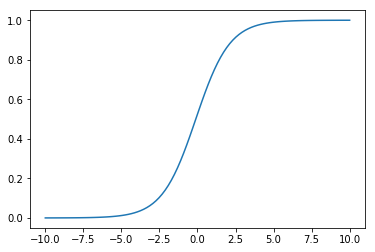

In [5]:
#plotting the sigmoid function
plt.plot(X,Y)
plt.show()

what if my weights are negative?

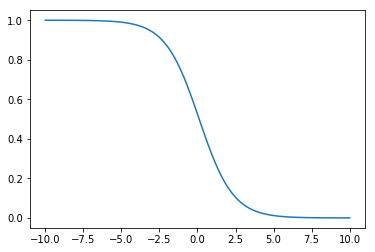

In [6]:
w,b = -0.9,0.1
X = np.linspace(-10,10,100)

Y = sigmoid(X,w,b) 
plt.plot(X,Y)
plt.show()

what if the bias is increasing?

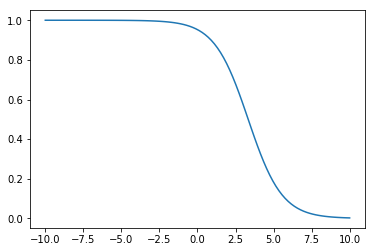

In [7]:
w,b = -0.9,3
X = np.linspace(-10,10,100)

Y = sigmoid(X,w,b) 
plt.plot(X,Y)
plt.show()

What if the number of dimensions are more than? I'm considering a 2d case because visualizing more than 2d is a tough task

In [8]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [9]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [10]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1 , XX2 = np.meshgrid(X1,X2)

print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


Text(0.5,0,'y')

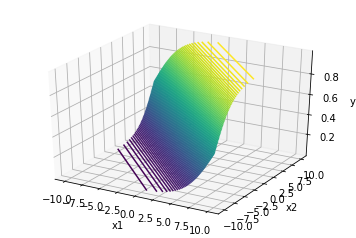

In [11]:
w1 = 0.5
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1,XX2,Y,100,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

It seems contour3D is not the right choice for this. Let's try other options to visualize.

Text(0.5,0,'y')

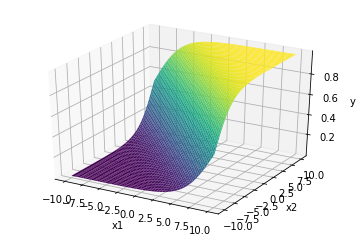

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

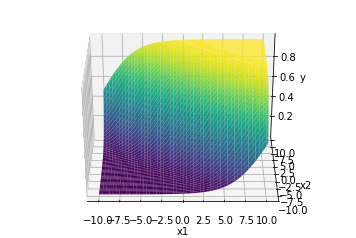

In [13]:
#looking the same graph from a different angle

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,270)

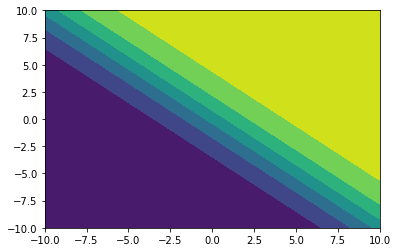

In [14]:
# plotting a contour plot to visualize decisin boundary of sigmoid function

plt.contourf(XX1,XX2,Y)
plt.show()

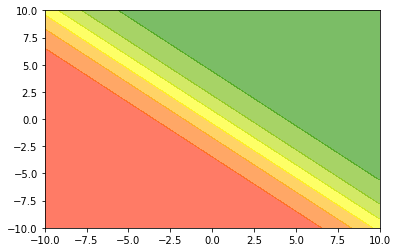

In [15]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

for a particular value of x1, as x2 increases y also increases.

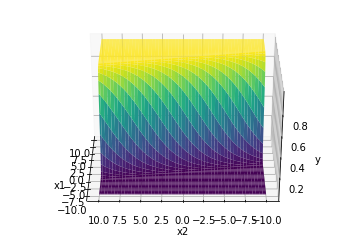

In [16]:
w1 = 2
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


ax.view_init(30,180)

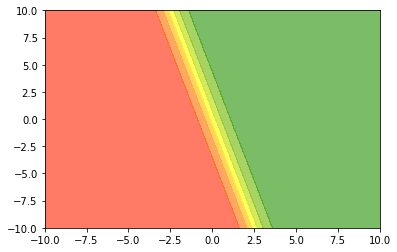

In [17]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

since the weight for x2 is more than the previous case, the sigmoid function becomes sharper so it transitions faster. So if we take a cut horizontally (along w2), the transition is represented by a thinner band. Similarly, if we take a cut along vertical line the transition is not as sharp as it was in the previous case because weight w1 is less.  

# Compute loss function for a given dataset

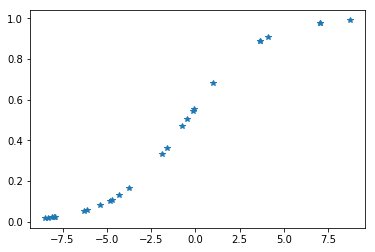

In [18]:
w_unknown = 0.5
b_unknown = 0.25

#generating random X,Y
X = np.random.random(25)*20 - 10
Y = sigmoid(X,w_unknown,b_unknown)
plt.plot(X,Y,'*')
plt.show()


In [19]:
#defining a function to calculate squared error loss

def calculate_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss += (y-sigmoid(x,w_est,b_est))**2
    return loss

In [20]:
W = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,b)
loss = np.zeros(WW.shape)

WW.shape

(100, 100)

In [21]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

Text(0.5,0,'Loss')

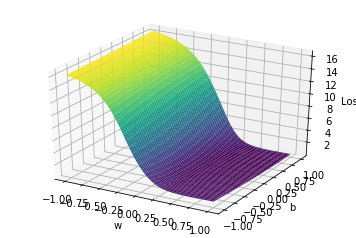

In [22]:
#plotting loss function

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

Text(0.5,0,'Loss')

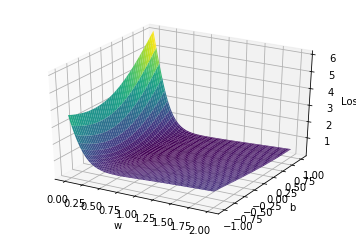

In [23]:
W = np.linspace(0,2,100)
b = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,b)
loss = np.zeros(WW.shape)

for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])
        
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

In [24]:
ij  = np.argmin(loss)
i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i * loss.shape[1])

In [25]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


##  Class for Sigmoid Neuron

In [80]:
#without including loss function

class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
    
        for i in range(epochs):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)       
            self.w -= learning_rate * dw
            self.b -= learning_rate * db    
    
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

## Fit for toy data

In [27]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

Next, I'm writing a function to visualize how the gradient descent is learning the decision boundary. Sigmoid neuron works best if the data is linearly separable. For simplicity I'm considering linearly separable data.

In [28]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

In [29]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

print(sn.w,sn.b)

[[ 0.241801   -0.98934106]] [0.01566467]


[[ 0.56414779 -0.07049768]] [-0.0049645]
[[ 0.73934028 -0.53183717]] [-0.08482503]
[[1.13741461 0.02693457]] [-0.13282078]
[[ 1.09385794 -0.65297725]] [-0.19442964]
[[ 1.40661589 -0.15808142]] [-0.25790601]
[[ 1.32735276 -0.72309734]] [-0.35389094]
[[ 1.58234058 -0.30614222]] [-0.41203848]
[[ 1.52898137 -0.67157226]] [-0.48458965]
[[ 1.65772656 -0.47341972]] [-0.52039527]
[[ 1.66127253 -0.57564639]] [-0.55446529]


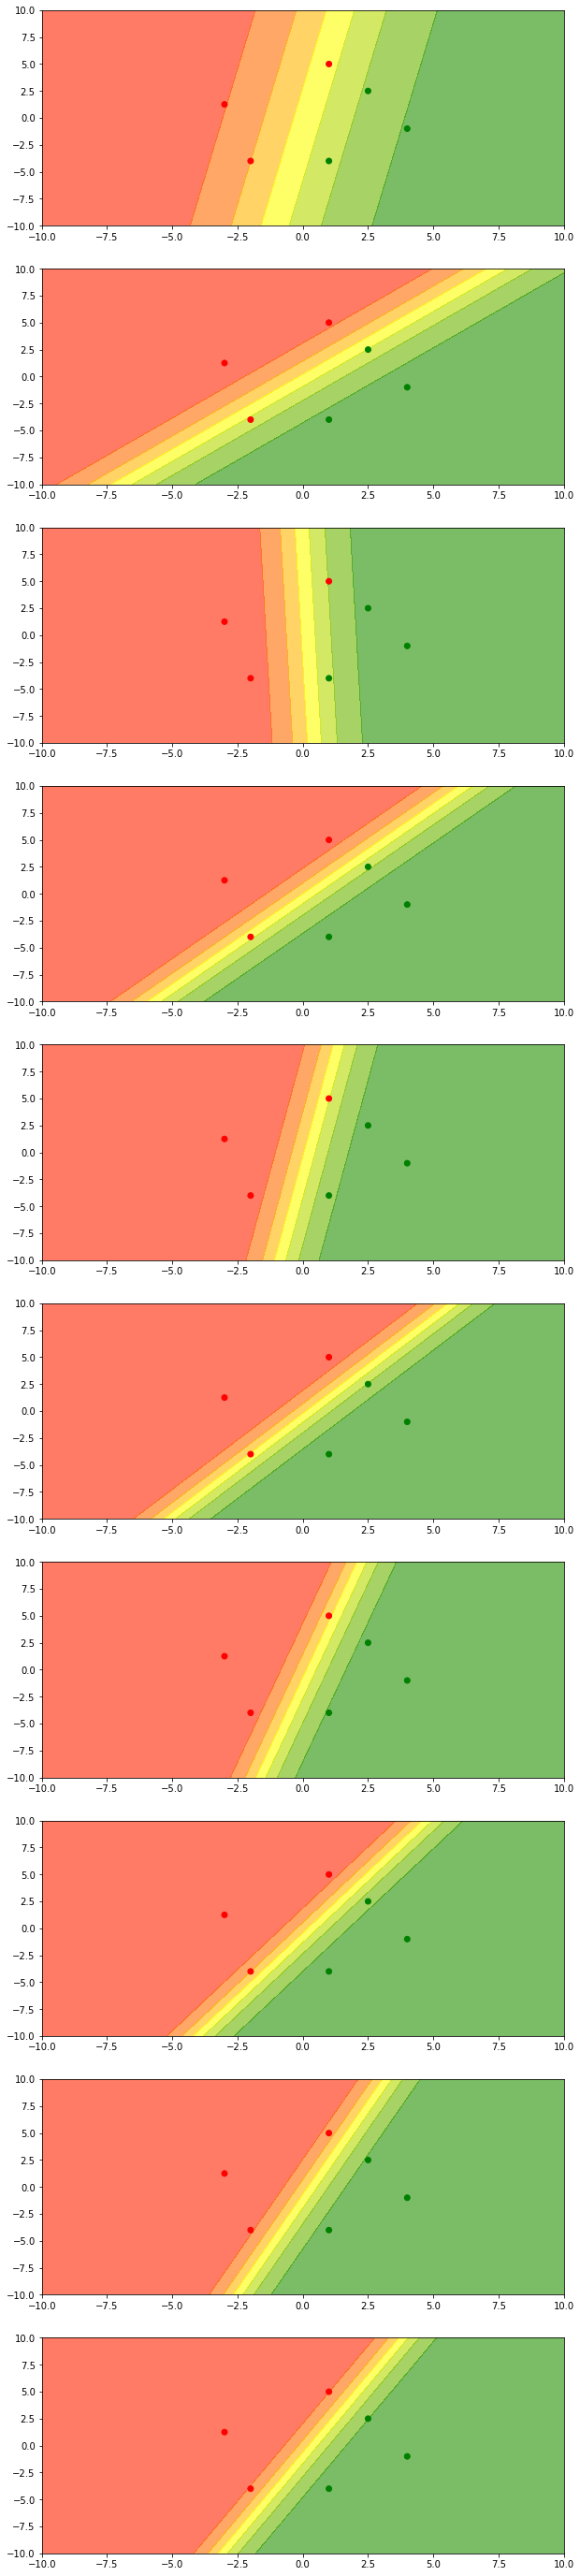

In [30]:
sn.fit(X, Y, 1, 0.05, True)
N = 10
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)

In the above plots we can see how the gradient descent started with randm initialization but with proper learning and number of epochs it converges to give perfect decision boundary.

### Load Data

In [31]:
data = pd.read_csv('mobile_cleaned-1551253091700.csv')

In [32]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [33]:
data.shape

(341, 88)

In [34]:
X = data.drop('Rating',axis=1)
Y = data['Rating'].values

creating a binarised column based on the rating of the phone.

In [35]:
threshold = 4.1
data['class'] = (data['Rating']>threshold).astype(np.int)

data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [36]:
Y_binarised = data['class'].values

#### Train Test split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


### Standardisation

In [38]:
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

C:\Users\mgangwar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mgangwar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mgangwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [39]:
minmax_scaler = MinMaxScaler()

Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [40]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]
scaled_threshold

0.6399999999999999

In [41]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

Y_binarised_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [81]:
sn = SigmoidNeuron()

### Training sigmoid neuron

In [82]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=5000, learning_rate=0.01)

In [83]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [84]:
Y_pred_binarised_train = (Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test>scaled_threshold).astype("int").ravel()

In [85]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

print(accuracy_train,accuracy_test)

0.8 0.7441860465116279


#### Sigmoid Neuron with loss

In [95]:
#without including loss function

class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True,display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss={}
    
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)       
            self.w -= learning_rate * dw
            self.b -= learning_rate * db    
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred,Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

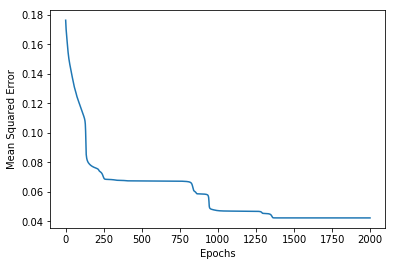

In [96]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015,display_loss=True)

In [97]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [98]:
Y_pred_binarised_train = (Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test>scaled_threshold).astype("int").ravel()

In [99]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

print(accuracy_train,accuracy_test)

0.788235294117647 0.8023255813953488
